## Observations and Insights 

In [100]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
# looking at the datasets, study results has quotes around everything

mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_df = pd.merge(mouse_metadata, study_results, how='left', on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
combined_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [101]:
# Checking the number of mice.
mousecolumn = combined_mouse_df["Mouse ID"].unique()
len(mousecolumn)

249

In [102]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# find rows where mouse ID and timepoint are the same as another row
duplicate_mouse_array = combined_mouse_df.loc[combined_mouse_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
print(duplicate_mouse_array)

# new_list = []
# for index, row in combined_mouse_df.iterrows():
#     mouse_id = row[0]
#     timepoint = row[5]
#     if (mouse_id,timepoint) not in new_list:
#         new_list.append((mouse_id,timepoint))
#     else:
#         print(mouse_id,timepoint,row.index)
    


['g989']


In [103]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_df = combined_mouse_df.loc[combined_mouse_df["Mouse ID"] == "g989", :]
g989_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [104]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# clean_mouse_df = combined_mouse_df[combined_mouse_df['Mouse ID'].isin(duplicate_mouse_array)==False]
clean_mouse_df = combined_mouse_df[combined_mouse_df['Mouse ID']!='g989']
clean_mouse_df



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [105]:
# Checking the number of mice in the clean DataFrame.
newmousecolumn = clean_mouse_df["Mouse ID"].unique()
len(newmousecolumn)

248

## Summary Statistics

In [106]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# clean_mouse_df["Tumor Volume (mm3)"].describe()
mean_series = clean_mouse_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median_series = clean_mouse_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance_series = clean_mouse_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
stdev_series = clean_mouse_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
SEM_series = clean_mouse_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
#type(SEM_series)

# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary_table_df = pd.DataFrame({"Mean": mean_series,
                           "Median": median_series,
                           "Variance": variance_series,
                           "St. Dev.": stdev_series,
                           "SEM": SEM_series})

summary_table_df


,Mean,Median,Variance,St. Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [107]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# use .agg function
summary_table2_df = clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# This method produces everything in a single groupby function
summary_table2_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

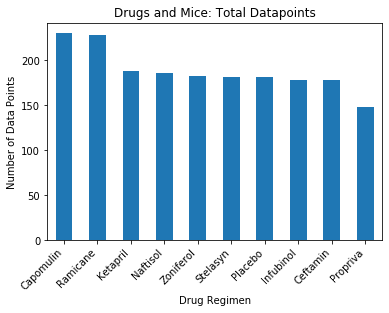

In [96]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

#df = pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})
#ax = df.plot.bar(x='Drug Regimen', y='val', rot=0)

# Get a count of number of mice for each drug


# Use DataFrame.plot() in order to create a bar chart of the data
#state_and_inches.plot(kind="bar", figsize=(20,3))

# Set a title for the chart
#plt.title("Average Rain Per State")

#note this is not just the number of mice, but the total number of mice datapoints

datapoints_series = clean_mouse_df['Drug Regimen'].value_counts()
datapoints_series.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Number of Data Points")
plt.title("Drugs and Mice: Total Datapoints")
plt.show()

#type(datapoints_series)


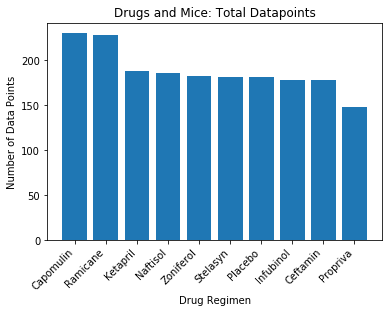

In [109]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
datapoints_series = clean_mouse_df['Drug Regimen'].value_counts()
# x_axis = np.arange(len('Drug Regimen'))
# plt.bar(x_axis, datapoints_series)
plt.bar(datapoints_series.index.values,datapoints_series.values)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Number of Data Points")
plt.title("Drugs and Mice: Total Datapoints")
plt.show()


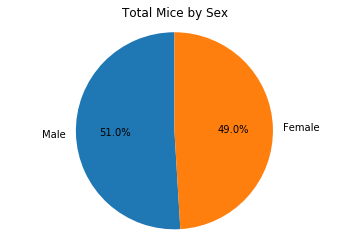

In [136]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
clean_mouse_df

gender_series = clean_mouse_df["Sex"].value_counts()
#gender_series
#plt.pie(gender_series, labels=gender_series.index.values, autopct="%1.1f%%", shadow=True, startangle=140)
gender_series.plot.pie(startangle=90, y="", autopct='%1.1f%%')
plt.title("Total Mice by Sex")
plt.axis("equal")
plt.ylabel("")
plt.show()



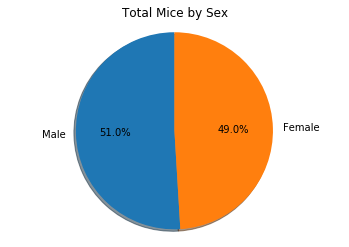

In [135]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#create series for male vs. female called gender_series
# series = clean_mouse_df - "Sex" value counts

gender_series = clean_mouse_df["Sex"].value_counts()
#gender_series
plt.pie(gender_series, labels=gender_series.index.values, startangle=90, autopct="%1.1f%%", shadow=True)
plt.title("Total Mice by Sex")
plt.axis("equal")
plt.ylabel("")
plt.show()

## Quartiles, Outliers and Boxplots

In [140]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_mouse_df.groupby(["Mouse ID"])['Timepoint'].max()
last_timepoint = last_timepoint.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = last_timepoint.merge(clean_mouse_df,on=['Mouse ID','Timepoint'],how="left")
merged_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [142]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_df.loc[merged_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


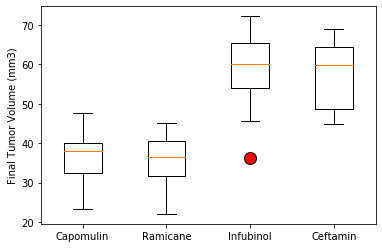

In [143]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot(tumor_vol_list, labels = drug_list,flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

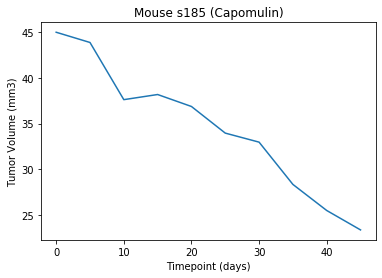

In [151]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = clean_mouse_df.loc[clean_mouse_df['Drug Regimen'] == "Capomulin"]
mousedata = capomulin_df.loc[capomulin_table['Mouse ID']== 's185']
plt.plot(mousedata['Timepoint'],mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Mouse s185 (Capomulin)')
plt.show()
# capomulin_df

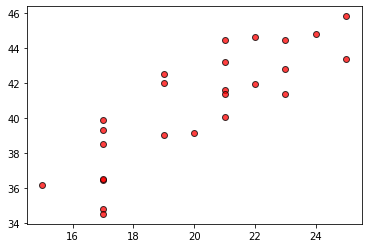

In [163]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Weight (g)	Tumor Volume (mm3)
# weight_series = capomulin_df['Weight (g)'].mean
# tumor_series = capomulin_df['Tumor Volume (mm3)'].mean

#create a new df with just the averages from the capomulin df
capomulin_avg_df = capomulin_df.groupby(['Mouse ID']).mean()


# create the scatter, with weight avg as x-axis, Tumor vol avg as y-axis
plt.scatter(capomulin_avg_df["Weight (g)"], capomulin_avg_df["Tumor Volume (mm3)"], marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)
plt.show()

#capomulin_average

## Correlation and Regression

In [168]:
from matplotlib import pyplot as plt
from scipy.stats import linregress
from scipy.stats import pearsonr
import numpy as np

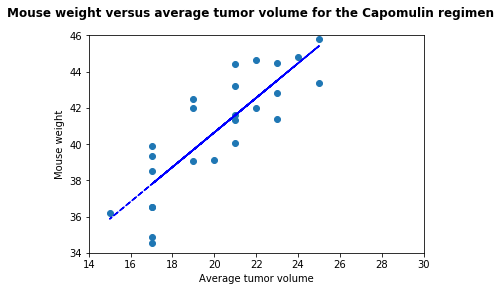

NameError: name 'pearsonr' is not defined

In [169]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# use scipy.stats.linregress; correlation coefficient will be between -1 and 1

# find the fit line: y = mx + b
x_axis = capomulin_avg_df["Weight (g)"]
y_values = capomulin_avg_df["Tumor Volume (mm3)"]
(slope, intercept, _, _, _) = linregress(x_axis, y_values)
fit = slope * x_axis + intercept

# graph the line and the scatter plot together using subplot()
fig, ax = plt.subplots()

fig.suptitle("Mouse weight versus average tumor volume for the Capomulin regimen", fontsize=12, fontweight="bold")

ax.set_xlim(14, 30)
ax.set_ylim(34, 46)

ax.set_xlabel("Average tumor volume")
ax.set_ylabel("Mouse weight")

ax.plot(x_axis, y_values, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.show()

# calculate Pearson's correlation
# create a variable for data1, the scatter data; then use fix as the line data
data1 = capomulin_avg_df["Weight (g)"] + capomulin_avg_df["Tumor Volume (mm3)"]
corr, _ = pearsonr(data1, fit)
print('Pearsons correlation: %.3f' % corr)